In [452]:
import torch
from torch.utils.data import Dataset,DataLoader,SequentialSampler,RandomSampler,BatchSampler,default_collate
import matplotlib.pyplot as plt
from torch.nn import Linear
from torch import optim,nn
import os
import cv2
import numpy as np
import glob

In [453]:



class shape_dataset(Dataset):
    def __init__(self,path_list):
        self.path_list=path_list
        self.label=np.zeros((len(path_list),5),dtype=np.float32)
        self.label[:1000,0],self.label[1000:2000,1],self.label[2000:3000,2],self.label[3000:4000,3],self.label[4000:5000,4]=1,1,1,1,1
        

    def __getitem__(self,index):
        self.image=cv2.imread(self.path_list[index],cv2.IMREAD_GRAYSCALE)
        self.image=cv2.resize(self.image,(50,50),cv2.INTER_LINEAR)
        self.image=torch.tensor(self.image,dtype=torch.float32)/255.0
        self.label[index]=torch.tensor(self.label[index],dtype=torch.float32)

        return self.image,self.label[index]

    def __len__(self):
        return len(self.path_list)

In [454]:
path_list=glob.glob("Shape_Data/**/*.jpg")

In [455]:
dataset=shape_dataset(path_list)
dataset[999]
# plt.imshow(dataset)
# plt.imshow(dataset[1002][0])

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 array([1., 0., 0., 0., 0.], dtype=float32))

In [456]:
batch_size=10


# train_loader=[]
# test_loader=[]


train_size = int(0.8 * len(dataset))
test_size = int(0.2*len(dataset))

print(train_size,test_size)

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])



4000 1000


In [490]:
class LR(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super().__init__()
        self.n_input=n_input
        self.n_output=n_output
        self.n_hidden=n_hidden
        self.linear_layer1=nn.Linear(self.n_input,self.n_hidden)
        self.linear_layer2=nn.Linear(self.n_hidden,self.n_output)
        # self.softmax=nn.Softmax()
        self.sig=nn.Sigmoid()

    def forward(self,x):
        # x=x.reshape((self.n_input,1))
        x=x.reshape(-1,2500)
        # print(x.shape)
        x1=self.linear_layer1(x)
        # print(x.shape)
        x1=self.sig(x1)
        out=self.linear_layer2(x1)
        # print(out)
        return self.sig(out)


400


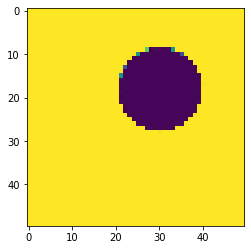

In [491]:
train_loader=DataLoader(train_dataset,batch_size=batch_size)
test_loader=DataLoader(test_dataset,batch_size=batch_size)

# for i in train_dataset:
plt.imshow(train_dataset[0][0])
print(len(train_loader))

In [492]:
criteria=nn.CrossEntropyLoss()

In [493]:
torch.manual_seed(1)
n_input=2500
n_output=5
n_hidden=64

lr=LR(n_input,n_hidden,n_output)

sgd=optim.SGD(lr.parameters(),0.01)


print(list(lr.parameters()))


def Shape_nn(lr,train_loader,test_loader,sgd,criteria):
    fig=plt.figure(figsize=(10,10))

    test_loss=[]
    train_loss=[]
    for epoch in range(50):
    
        for x,y in train_loader:
            # print(x)
            
            # print(x.shape)
            yhat_train=lr(x)
            # print(y.shape)
            # print(yhat_train.shape)
            # print(yhat_train.dtype,y.dtype)

            trloss=criteria(yhat_train,y)
            # print(trloss.dtype)
            

            # print("y, yhat  ",y,yhat_train)
            sgd.zero_grad()
            trloss.backward()
            sgd.step()
        train_loss.append(trloss.detach().numpy())
        print(f"for epoch {epoch} | train_loss :: {trloss}".format(epoch,trloss))
        
        # train_loss.append(train_loss)
        # fig.add_subplot(5,5,epoch+1)
        # plt.plot(train_loss)
        # print(train_loss.dtype)
        for x2,y2 in test_loader:
            
            yhat_test=lr(x2)
            tsloss=criteria(y2,yhat_test)
        print(f"for epoch {epoch} | test_loss :: {tsloss}".format(epoch,tsloss)) 
        test_loss.append(tsloss.detach().numpy())
        # print(test_loss.dtype)       
    
    # print(f"for epoch {i} | train_loss :: {train_loss03978462144732475[i]}".format(i,train_loss[i]))

    return lr,train_loss,test_loss

[Parameter containing:
tensor([[ 0.0103, -0.0088, -0.0039,  ...,  0.0118, -0.0179, -0.0041],
        [ 0.0022, -0.0091,  0.0093,  ...,  0.0011,  0.0103,  0.0164],
        [ 0.0013,  0.0026,  0.0062,  ..., -0.0005,  0.0096,  0.0025],
        ...,
        [-0.0111,  0.0115, -0.0153,  ...,  0.0135,  0.0167, -0.0117],
        [ 0.0025,  0.0103, -0.0060,  ..., -0.0165, -0.0035,  0.0117],
        [-0.0112, -0.0143,  0.0152,  ..., -0.0097,  0.0042, -0.0028]],
       requires_grad=True), Parameter containing:
tensor([-0.0089,  0.0079, -0.0040,  0.0114,  0.0128, -0.0145, -0.0032, -0.0025,
        -0.0148,  0.0181, -0.0035,  0.0094,  0.0008,  0.0130, -0.0061,  0.0169,
         0.0020, -0.0158,  0.0140,  0.0144, -0.0160,  0.0117,  0.0037,  0.0006,
         0.0189,  0.0094, -0.0178, -0.0016,  0.0089,  0.0110, -0.0191,  0.0193,
         0.0119,  0.0183,  0.0140, -0.0142,  0.0198,  0.0088, -0.0135,  0.0184,
        -0.0096, -0.0019, -0.0047,  0.0068, -0.0074,  0.0110,  0.0033,  0.0058,
        -0.01

torch.Size([64, 2500])
torch.Size([5])


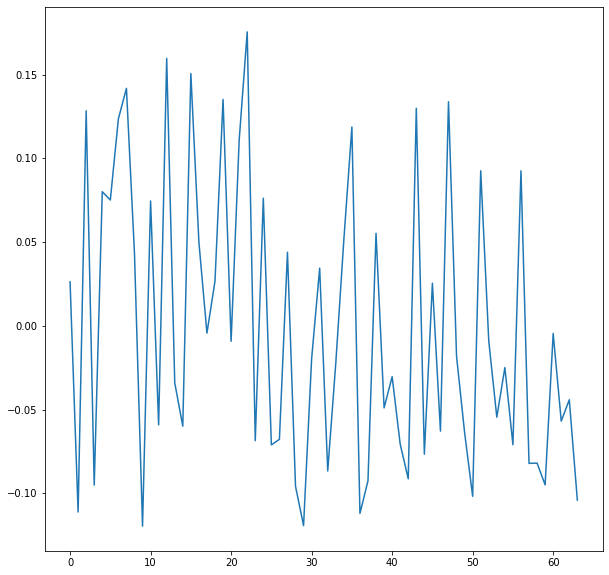

In [513]:



lr.state_dict()
print(lr.state_dict()['linear_layer1.weight'].shape)
print(lr.state_dict()['linear_layer2.bias'].shape)
plt.figure(figsize=(10,10))

plt.plot(lr.state_dict()['linear_layer2.weight'][0])
# plt.scatter(,lr.state_dict()['linear_layer1.bias'])

In [495]:
predicted,test_loss,train_loss=Shape_nn(lr,train_loader,test_loader,sgd,criteria)

for epoch 0 | train_loss :: 1.6272594928741455
for epoch 0 | test_loss :: 3.834944486618042
for epoch 1 | train_loss :: 1.6240936517715454
for epoch 1 | test_loss :: 3.81648588180542
for epoch 2 | train_loss :: 1.6224521398544312
for epoch 2 | test_loss :: 3.8038229942321777
for epoch 3 | train_loss :: 1.6213363409042358
for epoch 3 | test_loss :: 3.7939705848693848
for epoch 4 | train_loss :: 1.620507001876831
for epoch 4 | test_loss :: 3.786241054534912
for epoch 5 | train_loss :: 1.6198530197143555
for epoch 5 | test_loss :: 3.7804150581359863
for epoch 6 | train_loss :: 1.619297742843628
for epoch 6 | test_loss :: 3.7763290405273438
for epoch 7 | train_loss :: 1.6188156604766846
for epoch 7 | test_loss :: 3.7737934589385986
for epoch 8 | train_loss :: 1.6184017658233643
for epoch 8 | test_loss :: 3.7726051807403564
for epoch 9 | train_loss :: 1.6180503368377686
for epoch 9 | test_loss :: 3.7725818157196045
for epoch 10 | train_loss :: 1.6177504062652588
for epoch 10 | test_loss :: 

<Figure size 720x720 with 0 Axes>

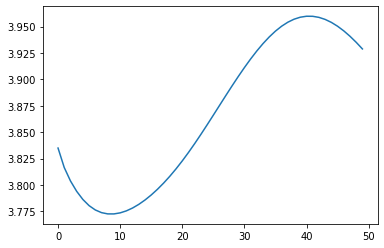

In [496]:
plt.plot(train_loss)

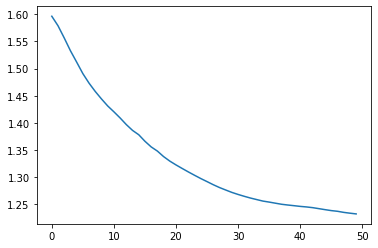

In [484]:
plt.plot(test_loss)

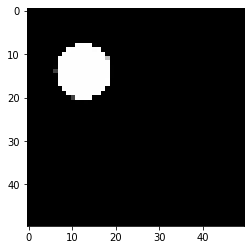

In [485]:
test=cv2.imread("Shape_Data/Circle/circle562.jpg",cv2.IMREAD_GRAYSCALE)
test=cv2.resize(test,(50,50))
plt.imshow(test,cmap="gray")
test=torch.tensor(test,dtype=torch.float32)/255.0

In [486]:
print({0:"circle",1:"pentagon",2:"square",3:"star",4:"triangle"})
print()
print(predicted(test))


{0: 'circle', 1: 'pentagon', 2: 'square', 3: 'star', 4: 'triangle'}

tensor([[0.0000, 0.0000, 0.0246, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)


(50, 50)


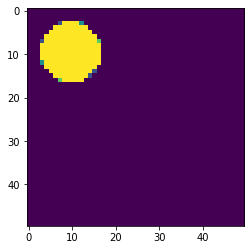

In [487]:
x=np.zeros((500,500),dtype=np.uint8)

# cv2.rectangle(x,(100,100),(200,200),(255,255,255),thickness=-1)
cv2.circle(x,(100,100),70,(255,255,255),thickness=-1)
test=cv2.resize(x,(50,50))
print(test.shape)
plt.imshow(test)

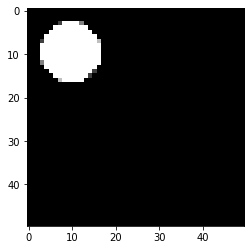

In [488]:
# test=cv2.imread("Shape_Data/Square/square4.jpg",cv2.IMREAD_GRAYSCALE) 
# test=cv2.resize(test,(50,50))
plt.imshow(test,cmap="gray")
test=torch.tensor(test,dtype=torch.float32)/255.0

In [489]:
print({0:"circle",1:"pentagon",2:"square",3:"star",4:"triangle"})
print()
predicted_value=predicted(test)
print(predicted_value)
# print(torch.max(predicted_value)

{0: 'circle', 1: 'pentagon', 2: 'square', 3: 'star', 4: 'triangle'}

tensor([[0., 0., 0., 0., 0.]], grad_fn=<ReluBackward0>)


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


TypeError: cannot unpack non-iterable int object